In [5]:
import pickle
import numpy as np
fr=open("./results/predict1129.txt","rb")

result=pickle.load(fr)
fr.close()
con_p=result[0][-30:]
act_p=result[1][-30:]

In [6]:
print(con_p,act_p)

[712.4, 709.2, 702.9, 668.7, 654.7, 644.4, 612.7, 612.2, 613.1, 629.0, 634.0, 703.4, 691.4, 688.6, 686.1, 684.9, 673.7, 681.8, 664.8, 669.5, 667.5, 664.7, 677.1, 657.6, 675.0, 673.8, 683.3, 698.2, 705.0, 706.9] [650.2, 642.0, 646.6, 688.4, 660.3, 654.9, 617.2, 614.8, 616.5, 627.5, 632.3, 702.1, 693.4, 701.6, 675.2, 689.7, 686.7, 641.9, 676.2, 680.8, 683.9, 685.1, 698.4, 623.4, 680.2, 642.8, 676.5, 691.1, 704.4, 695.3]


In [8]:
import pandas as pd

data=pd.read_csv(r"data.csv")
data=data.iloc[-30:,:]
con=data['con_settlement'].values.tolist()
con_closing=data['con_closing'].values.tolist()
act=data['act_settlement'].values.tolist()
act_closing=data['act_closing'].values.tolist()

In [9]:
# Mean Absolute Error, MAE
mea=0
for i in range(30):
    mea+=abs(con_p[i]-con[-30+i])
mea/30

8.95333333333333

In [12]:
# mean absolute percentage error, MAPE
mape=0
for i in range(30):
    mape+=abs(con[-30+i]-con_p[i])*100/con[-30+i]
mape/30

1.3261969028680205

In [11]:
# symmetric mean absolute percentage error, SMAPE
smape=0
for i in range(30):
    smape+=abs(con_p[i]-con[-30+i])/((con_p[i]+con[-30+i])/2)
smape/30

0.013379433258801376

In [13]:
# Mean Squared Error, MSE
mse=0
for i in range(30):
    mse+=(con_p[i]-con[-30+i])**2
mse/30

224.3553333333331

In [14]:
# root mean squared error, RMSE
(mse/30)**0.5

14.97849569660896

In [15]:
# Mean Squared log error, MSLE
msle=0
for i in range(30):
    msle+=(np.log(1+con[-30+i])-np.log(1+con_p[i]))**2
msle/30

0.0005054258054811904

In [18]:
ratio=[]
for i in range(1,len(data)):
    ratio.append(abs(data.iloc[i]['con_settlement']-data.iloc[i-1]['con_settlement'])/data.iloc[i-1]['con_settlement'])
np.mean(ratio)+np.var(ratio),np.mean(ratio)-np.var(ratio)

(0.016501597862825942, 0.015570022471657077)

In [92]:
print(con,act)

[428.6, 428.5, 426.4, 417.7, 429.8, 428.7, 431.4, 428.6, 422.0, 424.0, 420.2, 409.2, 404.9, 414.4, 427.7, 434.0, 434.3, 434.3, 434.3, 440.3, 438.9, 455.7, 451.6, 454.3, 451.0, 454.7, 453.5, 462.1, 463.3, 463.8, 468.2, 474.3, 471.0, 474.7, 484.8, 492.2, 501.9, 496.5, 495.7, 526.9, 526.9, 531.3, 528.0, 520.6, 525.2, 534.1, 530.2, 530.1, 531.4, 528.2, 527.6, 527.7, 523.0, 510.6, 516.9, 521.0, 531.3, 526.8, 513.6, 516.0, 522.2, 526.3, 530.7, 526.7, 517.7, 513.3, 510.8, 514.8, 511.8, 513.5, 500.1, 504.5, 518.9, 524.9, 498.6, 491.1, 457.2, 444.7, 445.2, 435.6, 450.9, 456.5, 473.4, 475.4, 472.4, 475.1, 473.7, 460.2, 465.5, 477.9, 459.8, 454.7, 458.3, 458.3, 474.9, 475.6, 486.1, 493.0, 494.3, 496.7, 494.1, 500.9, 504.9, 515.7, 511.6, 509.1, 515.1, 525.0, 533.4, 542.1, 542.3, 545.3, 539.4, 533.7, 540.5, 529.9, 533.6, 545.6, 542.4, 566.9, 558.7, 547.7, 548.9, 553.8, 561.6, 565.1, 555.5, 561.2, 558.9, 563.1, 582.6, 590.3, 584.5, 609.2, 600.5, 614.8, 648.6, 686.8, 705.0, 712.3, 763.9, 805.0, 742.1

In [106]:
count=0
count1=0
count2=0
count3=0
count4=0
for i in range(2,62):
    if (con_p[i]-con[i-1])*(con[i]-con[i-1])>0:
        count+=1
    if (con_p[i]-con[i-1])*(con[i-1]-con[i-2])>0:
        count1+=1
    if (con_p[i]-con[i-1])*(con_closing[i-1]-con_closing[i-2])>0:
        count2+=1
    if (con_p[i]-con[i-1])*(con_closing[i-1]-con[i])>0:
        count3+=1
    if (con[i]-con[i-1])*(con_closing[i-1]-con_closing[i-2])>0:
        count4+=1
count/60,count1/60,count2/60,count3/60,count4/60

(0.7666666666666667, 0.55, 0.6666666666666666, 0.4, 0.6166666666666667)

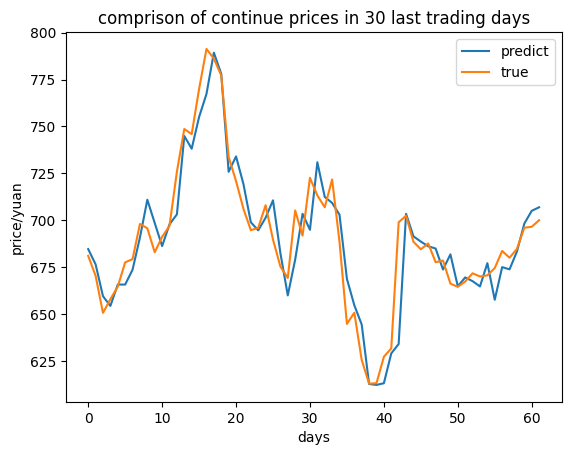

In [107]:
import matplotlib.pyplot as plt

plt.plot(con_p,label="predict")
plt.plot(con,label="true")
plt.xlabel("days")
plt.ylabel("price/yuan")
# plt.plot(con_closing,label="closing")
plt.title("comprison of continue prices in 30 last trading days")
plt.legend()
plt.show()

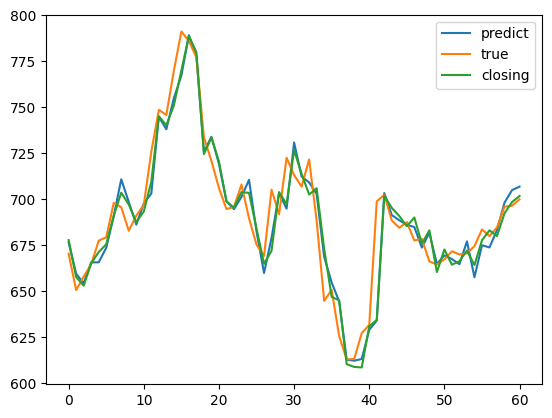

In [108]:
plt.plot(con_p[1:],label="predict")
plt.plot(con[1:],label="true")
plt.plot(con_closing[:-1],label="closing")
plt.legend()
plt.show()

0.75 [1.3679680295112169, -0.547195622435024, 0.1655130905808039, -1.741697416974163, -0.8390990725746993, -1.0315186246418404, 2.184849791576819, 2.2843754576072666, -0.7090146143828646, 0.11477761836441241, -3.140928502548554, -0.49425594442960796, -1.0457165839924862, -1.9353162748408856, -3.0329836977126248, 0.40707289148962367, 0.10293360782294833, -1.0767343600926933, 1.8171729782216706, 1.8694235943917195, 0.6045775154742956, -0.1868084494898627, -0.9463276836158256, 3.0303030303030267, 1.0661928031985852, -1.3897190675433455, -3.7152580828133925, 1.6767851980341173, -3.833379463050103, 2.481772293886698, 0.778044985146414, -1.732021615629763, 2.1063335270191748, 3.722661703117729, 0.6147226064238512, 3.021582733812946, -0.03263175069341357, -0.14679497634969454, -2.248086734693881, -0.4274180782016852, -9.28602088996995, 0.14236902050113895, 0.42120551924473165, 0.5989773557341158, -0.2181500872600349, 1.0773317591499343, -0.7074428887251223, 2.3416391474031686, 0.0451467268622

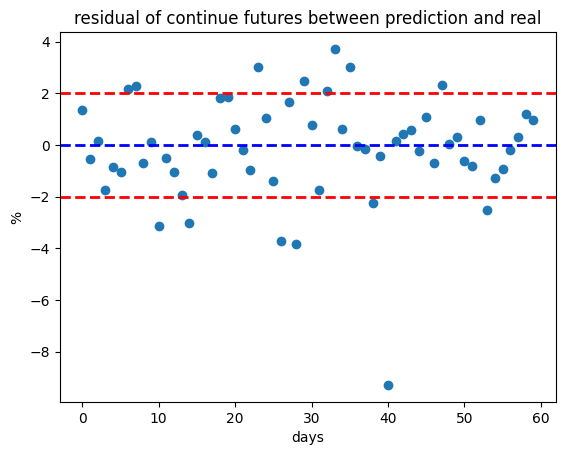

In [109]:
ratio=[]
count=0
for i in range(2,len(con)):
    ratio.append((con_p[i]-con[i])*100/con[i])
    if abs((con[i]-con_p[i])/con[i])<=0.02:
        count+=1
print(count/60,ratio)
plt.scatter(range(60),ratio)
plt.axhline(y=2, c="r", ls="--", lw=2)
plt.axhline(y=-2, c="r", ls="--", lw=2)
plt.axhline(y=0, c="b", ls="--", lw=2)
plt.ylabel("%")
plt.xlabel("days")
plt.title("residual of continue futures between prediction and real")
# plt.legend()
plt.show()

In [80]:
np.var(ratio),np.mean(ratio)

(4.058194218882552, -0.1482631436144709)

In [27]:
diff=[]
for i in range(30):
    diff.append((con[i]-con_p[i-1])/con[i])
np.mean(diff),np.var(diff)

(-0.0019316326896813179, 0.0014689512148724705)

0.7666666666666667 [0.009760927995473161, -0.02646529028682281, 0.025566531086577606, 0.043896385915929814, -0.0058398647610266915, 0.03117505995203837, -0.004242127590145249, -0.007013537758930139, -0.029815051020408233, -0.001266423935412487, -0.09228788095578767, -0.0007118451025056948, 0.009876543209876477, 0.009349890430971479, -0.0033449680046539676, 0.01844746162927981, -0.0038319823139278154, 0.025367757430201105, -0.006170052671181373, 0.008092312303311991, -0.010867947000148977, -0.00552238805970156, 0.0022368028631076647, -0.015270570793180066, -0.008630778232884695, 0.004558823529411798, -0.006864320140207456, -0.005172413793103481, 0.002871500358937545, 0.0025714285714285067]


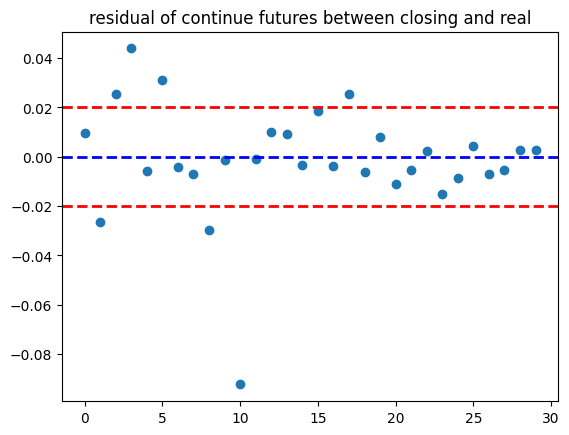

In [30]:
ratio=[]
count=0
for i in range(1,len(con)):
    ratio.append((con_closing[i-1]-con[i])/con[i])
    if abs((con_closing[i-1]-con[i])/con[i])<=0.02:
        count+=1
print(count/30,ratio)
plt.scatter(range(30),ratio)
plt.axhline(y=0.02, c="r", ls="--", lw=2)
plt.axhline(y=-0.02, c="r", ls="--", lw=2)
plt.axhline(y=0, c="b", ls="--", lw=2)
plt.title("residual of continue futures between closing and real")
# plt.legend()
plt.show()

In [31]:
diff=[]
for i in range(1,31):
    diff.append((con[i]-con_closing[i-1])/con[i])
np.mean(diff),np.var(diff)

(0.0013182005714494345, 0.0005224801775912455)

In [84]:
count=0
count1=0
count2=0
for i in range(2,30):
    if (act_p[i]-act_p[i-1])*(act[i]-act[i-1])>0:
        count+=1
    if (act[i]-act[i-1])*(act[i-1]*act[i-2])>0:
        count1+=1
    if (act_p[i]-act_p[i-1])*(act[i-1]-act[i-2])>0:
        count2+=1
count/28,count1/28,count2/28

(0.4642857142857143, 0.7142857142857143, 0.6428571428571429)

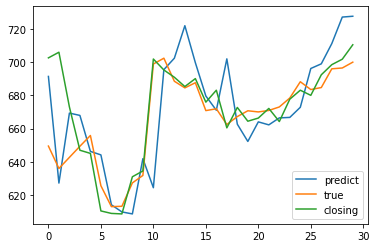

In [85]:
plt.plot(act_p,label="predict")
plt.plot(act,label="true")
plt.plot(con_closing,label="closing")
plt.legend()
plt.show()

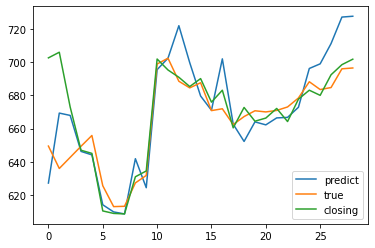

In [86]:
plt.plot(act_p[1:],label="predict")
plt.plot(act[:-1],label="true")
plt.plot(con_closing[:-1],label="closing")
plt.legend()
plt.show()

In [87]:
count=0
for i in range(30):
    if abs((con[i]-con_p[i])/con[i])<0.02:
        count+=1
    # else:
    #     print(i)
count/30

0.7333333333333333

In [88]:
count=0
for i in range(30):
    if abs((act[i]-act_p[i])/act[i])<0.02:
        count+=1
    # else:
    #     print(i)
count/30

0.5

In [9]:
diff=0
for i in range(30):
    diff+=abs((con[i]-con_p[i])/con[i])
(diff/30)

0.016187503875420544

In [90]:
diff=0
for i in range(30):
    diff+=((act[i]-act_p[i])/act[i])**2
(diff/30)**0.5

0.03409439883406421